In [1]:
# Caso queira baixar o download no Kaggle:
%pip install kaggle

     ---------------------------------------- 0.0/83.6 kB ? eta -:--:--
     ---------------------------------------- 83.6/83.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110697 sha256=c9026ce0e88ce18587fe3dea349d81553f6585cf5d8b64f14b18f0e6941e9b3e
  Stored in directory: c:\users\aldan\appdata\local\pip\cache\wheels\6a\2b\d0\457dd27de499e9423caf738e743c4a3f82886ee6b19f89d5b7
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Caso queira baixar o download no Kaggle:
import zipfile
import os
# from google.colab import files

import warnings
warnings.filterwarnings('ignore')

# Faça o upload do arquivo kaggle.json
# uploaded = files.upload()

# Configure as variáveis de ambiente para a API do Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\\Users\\Aldan\\Documents\\bird_classification\\'
# %chmod 600 /content/kaggle.json

# Baixe o conjunto de dados
!kaggle datasets download -d gpiosenka/100-bird-species

# Descompacte o arquivo baixado
with zipfile.ZipFile(r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species.zip', 'r') as zip_ref:
    zip_ref.extractall(r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\')


  0%|          | 0.00/1.96G [00:00<?, ?B/s]
  0%|          | 1.00M/1.96G [00:00<25:28, 1.37MB/s]
  0%|          | 2.00M/1.96G [00:00<12:42, 2.75MB/s]
  0%|          | 4.00M/1.96G [00:00<05:55, 5.90MB/s]
  0%|          | 8.00M/1.96G [00:01<02:46, 12.5MB/s]
  1%|          | 12.0M/1.96G [00:01<01:56, 17.9MB/s]
  1%|          | 15.0M/1.96G [00:01<01:47, 19.4MB/s]
  1%|          | 19.0M/1.96G [00:01<01:36, 21.6MB/s]
  1%|          | 22.0M/1.96G [00:01<01:28, 23.4MB/s]
  1%|          | 25.0M/1.96G [00:01<01:25, 24.1MB/s]
  1%|▏         | 28.0M/1.96G [00:01<01:22, 25.1MB/s]
  2%|▏         | 32.0M/1.96G [00:01<01:13, 28.1MB/s]
  2%|▏         | 36.0M/1.96G [00:02<01:08, 30.2MB/s]
  2%|▏         | 40.0M/1.96G [00:02<01:04, 31.8MB/s]
  2%|▏         | 44.0M/1.96G [00:02<01:02, 32.9MB/s]
  2%|▏         | 48.0M/1.96G [00:02<01:00, 33.7MB/s]
  3%|▎         | 52.0M/1.96G [00:02<00:59, 34.2MB/s]
  3%|▎         | 56.0M/1.96G [00:02<01:08, 29.8MB/s]
  3%|▎         | 60.0M/1.96G [00:02<01:05, 31.3MB/s]
 

In [9]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [23]:
%pip install pandas pillow seaborn openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 71.7/250.0 kB 438.9 kB/s eta 0:00:01
     ----------------- ------------------ 122.9/250.0 kB 654.9 kB/s eta 0:00:01
     ----------------------------- ------ 204.8/250.0 kB 831.5 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 904.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import re
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

In [10]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(255,255,255), same_line=False):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    if same_line:
        print(msg .format(mat), end='', flush=True)# does not go to a new line so next print is on the same line
    else:
        print(msg .format(mat), flush=True)
    print('\33[0m', end='',flush=True) # returns default print color to back to black
    return

In [11]:
# Verificando pastas que contém espaços duplos
def find_double_spaces_in_directories(root_dirs):
    for root_dir in root_dirs:
        if not os.path.exists(root_dir):
            print(f"O diretório '{root_dir}' não existe.")
            continue

        for root, dirs, _ in os.walk(root_dir):
            for dir_name in dirs:
                if '  ' in dir_name:  # Verifica se há espaços duplos no nome do diretório
                    print(f"Espaço duplo encontrado em: {os.path.join(root, dir_name)}")

# Diretórios raiz para procurar
root_dirs = [r'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train', 
             r'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\test', 
             r'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\valid']

# Chama a função
find_double_spaces_in_directories(root_dirs)


Espaço duplo encontrado em: C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\COCK OF THE  ROCK
Espaço duplo encontrado em: C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\ELLIOTS  PHEASANT
Espaço duplo encontrado em: C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\MIKADO  PHEASANT
Espaço duplo encontrado em: C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\PARAKETT  AUKLET
Espaço duplo encontrado em: C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\test\COCK OF THE  ROCK
Espaço duplo encontrado em: C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\test\ELLIOTS  PHEASANT
Espaço duplo encontrado em: C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\test\MIKADO  PHEASANT
Espaço duplo encontrado em: C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\test\PARAKETT  AUKLET
Espaço duplo enc

In [12]:
def rename_directories_with_double_spaces(root_dirs):
    for root_dir in root_dirs:
        if not os.path.exists(root_dir):
            print(f"O diretório '{root_dir}' não foi encontrado.")
            continue

        for current_path, dirnames, _ in os.walk(root_dir):
            for dirname in dirnames:
                if '  ' in dirname:
                    new_dirname = dirname.replace('  ', ' ')  # Substitui espaços duplos por um único espaço
                    original_path = os.path.join(current_path, dirname)
                    new_path = os.path.join(current_path, new_dirname)

                    try:
                        os.rename(original_path, new_path)
                        print(f"Renomeado: '{original_path}' para '{new_path}'")
                    except OSError as error:
                        print(f"Erro ao renomear '{original_path}': {error}")

# Lista de diretórios para verificar e renomear
root_dirs = [r'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train', 
             r'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\test', 
             r'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\valid']

# Executar a função
rename_directories_with_double_spaces(root_dirs)

Renomeado: 'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\COCK OF THE  ROCK' para 'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\COCK OF THE ROCK'
Renomeado: 'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\ELLIOTS  PHEASANT' para 'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\ELLIOTS PHEASANT'
Renomeado: 'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\MIKADO  PHEASANT' para 'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\MIKADO PHEASANT'
Renomeado: 'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\PARAKETT  AUKLET' para 'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\train\PARAKETT AUKLET'
Renomeado: 'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\test\COCK OF THE  ROCK' para 'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub

In [7]:
# Numa análise prévia, foi verificado que alguns nomes de diretórios continham
# espaços duplicados entre as palavras, provavelmente erro de digitação do autor
# do dataset. São os diretórios: COCK OF THE ROCK, ELLIOTS PHEASANT,
# MIKADO PHEASANT e PARAKETT AUKLET. Modifiquei o nome para que tenham apenas um espaco entre os nomes.

# Caminho atual do diretório
# cock_rock_tr = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train\\COCK OF THE  ROCK'
# cock_rock_te = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\test\\COCK OF THE  ROCK'
# cock_rock_va = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\valid\\COCK OF THE  ROCK'

# elliots_tr = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train\\ELLIOTS  PHEASANT'
# elliots_te = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\test\\ELLIOTS  PHEASANT'
# elliots_va = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\valid\\ELLIOTS  PHEASANT'

# mikado_tr = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train\\MIKADO  PHEASANT'
# mikado_te = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\test\\MIKADO  PHEASANT'
# mikado_va = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\valid\\MIKADO  PHEASANT'

# parakett_tr = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train\\PARAKETT  AUKLET'
# parakett_te = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\test\\PARAKETT  AUKLET'

# # Novo caminho com o novo nome do diretório
# novo_cock_rock_tr = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train\\COCK OF THE ROCK'
# novo_cock_rock_te = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\test\\COCK OF THE ROCK'
# novo_cock_rock_va = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\valid\\COCK OF THE ROCK'

# novo_elliots_tr = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train\\ELLIOTS PHEASANT'
# novo_elliots_te = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\test\\ELLIOTS PHEASANT'
# novo_elliots_va = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\valid\\ELLIOTS PHEASANT'

# novo_mikado_tr = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train\\MIKADO PHEASANT'
# novo_mikado_te = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\test\\MIKADO PHEASANT'
# novo_mikado_va = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\valid\\MIKADO PHEASANT'

# novo_parakett_tr = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train\\PARAKETT AUKLET'
# novo_parakett_te = r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\test\\PARAKETT AUKLET'

# os.rename(cock_rock_tr, novo_cock_rock_tr)
# os.rename(cock_rock_te, novo_cock_rock_te)
# os.rename(cock_rock_va, novo_cock_rock_va)

# os.rename(elliots_tr, novo_elliots_tr)
# os.rename(elliots_te, novo_elliots_te)
# os.rename(elliots_va, novo_elliots_va)

# os.rename(mikado_tr, novo_mikado_tr)
# os.rename(mikado_te, novo_mikado_te)
# os.rename(mikado_va, novo_mikado_va)

# os.rename(parakett_tr, novo_parakett_tr)
# os.rename(parakett_te, novo_parakett_te)

In [13]:
sdir= r'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species'
train_dir=os.path.join(sdir, 'train')
classes= sorted(os.listdir(train_dir))
class_count=len(classes)
dir_list=['train', 'test', 'valid']
train_total=0
test_total=0
valid_total=0
smallest_count=1000000
largest_count=0

msg='{0:^10s}{1:^30s}{2:^18s}{3:^18s}{4:^18s}'
msg=msg.format('Class Id', 'Bird Species', 'Train ','Test', 'Valid ')
print_in_color(msg, (0,255,255), (0,0,0))

for i, klass in enumerate(classes):
    tr_count=0
    te_count=0
    v_count=0
    normalized_klass = re.sub(' +', ' ', klass).strip()
    for d in dir_list:
        dpath=os.path.join(sdir, d)
        classpath=os.path.join(dpath, normalized_klass)
        # flist= os.listdir(classpath)
        try:
            flist = os.listdir(classpath)
        except FileNotFoundError:
            print(f"Não foi encontrado o diretório: {classpath}")
            continue

        length = len(flist)
        if 'train' in d:
            tr_count = length
            train_total += length
            if length > largest_count:
                largest_count=length
                largest_class=normalized_klass
            if length < smallest_count:
                smallest_count=length
                smallest_class=normalized_klass
        elif 'test' in d:
            te_count = length
            test_total +=length
        else:
            valid_total += length
            v_count = length
    msg='{0:^10s}{1:^30s}{2:^18s}{3:^18s}{4:^18s}'.format(str(i) ,normalized_klass, str(tr_count), str(te_count),str(v_count))
    toggle=i % 2
    if toggle==0:
        back_color=(255,255,255)
    else:
        back_color=(191, 239, 242)
    print_in_color(msg, (0,0,0), back_color)
print('{0:60s}'.format('-'))
msg='{0:^10s}{1:^30s}{2:^18s}{3:^18s}{4:^18s}'
msg=msg.format('TOTALS', str(class_count), str(train_total), str(test_total), str(valid_total))
print (msg)
print ('class ',largest_class,' has the most files= ',largest_count, ' class ', smallest_class, ' has the leat files= ', smallest_count)


 Class Id          Bird Species               Train              Test             Valid       
    0            ABBOTTS BABBLER               163                5                 5         
    1             ABBOTTS BOOBY                180                5                 5         
    2       ABYSSINIAN GROUND HORNBILL         179                5                 5         
    3         AFRICAN CROWNED CRANE            135                5                 5         
    4         AFRICAN EMERALD CUCKOO           154                5                 5         
    5           AFRICAN FIREFINCH              137                5                 5         
    6         AFRICAN OYSTER CATCHER           155                5                 5         
    7         AFRICAN PIED HORNBILL            187                5                 5         
    8          AFRICAN PYGMY GOOSE             179                5                 5         
    9               ALBATROSS                  132

In [ ]:
# test_dir=os.path.join(sdir, 'test')
# test_species_list=sorted(os.listdir(test_dir))
# classes=len(os.listdir(test_dir))
# height=int(classes/2)
# fig = plt.figure(figsize=(20,height))
# if classes % 5==0:
#     rows=int(classes/5)
# else:
#     rows=int(classes/5) +1
# for row in range(rows):
#     for column in range(5):
#         i= row * 5 + column
#         if i>classes-1:
#             break
#         specie=test_species_list[i]
#         species_path=os.path.join(test_dir, specie)
#         f_path=os.path.join(species_path, '1.jpg')
#         # Verifica se o arquivo existe
#         if os.path.isfile(f_path):
#           img = mpimg.imread(f_path)
#           a = fig.add_subplot(rows, 5, i+1)
#           imgplot=plt.imshow(img)
#           a.axis("off")
#           a.set_title(specie)
#         else:
#           print(f"Arquivo não encontrado: {f_path}")

# plt.show()

In [14]:
# train
train_dir = Path(sdir) / 'train'

# Get filepaths and labels
filepaths_train = list(train_dir.glob(r'**/*.JPG')) + list(train_dir.glob(r'**/*.jpg')) + list(train_dir.glob(r'**/*.PNG')) + list(train_dir.glob(r'**/*.png'))
labels_train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_train))

filepaths_train = pd.Series(filepaths_train, name='Filepath').astype(str)
labels_train = pd.Series(labels_train, name='Label')

# Concatenate filepaths and labels
image_df_train = pd.concat([filepaths_train, labels_train], axis=1)

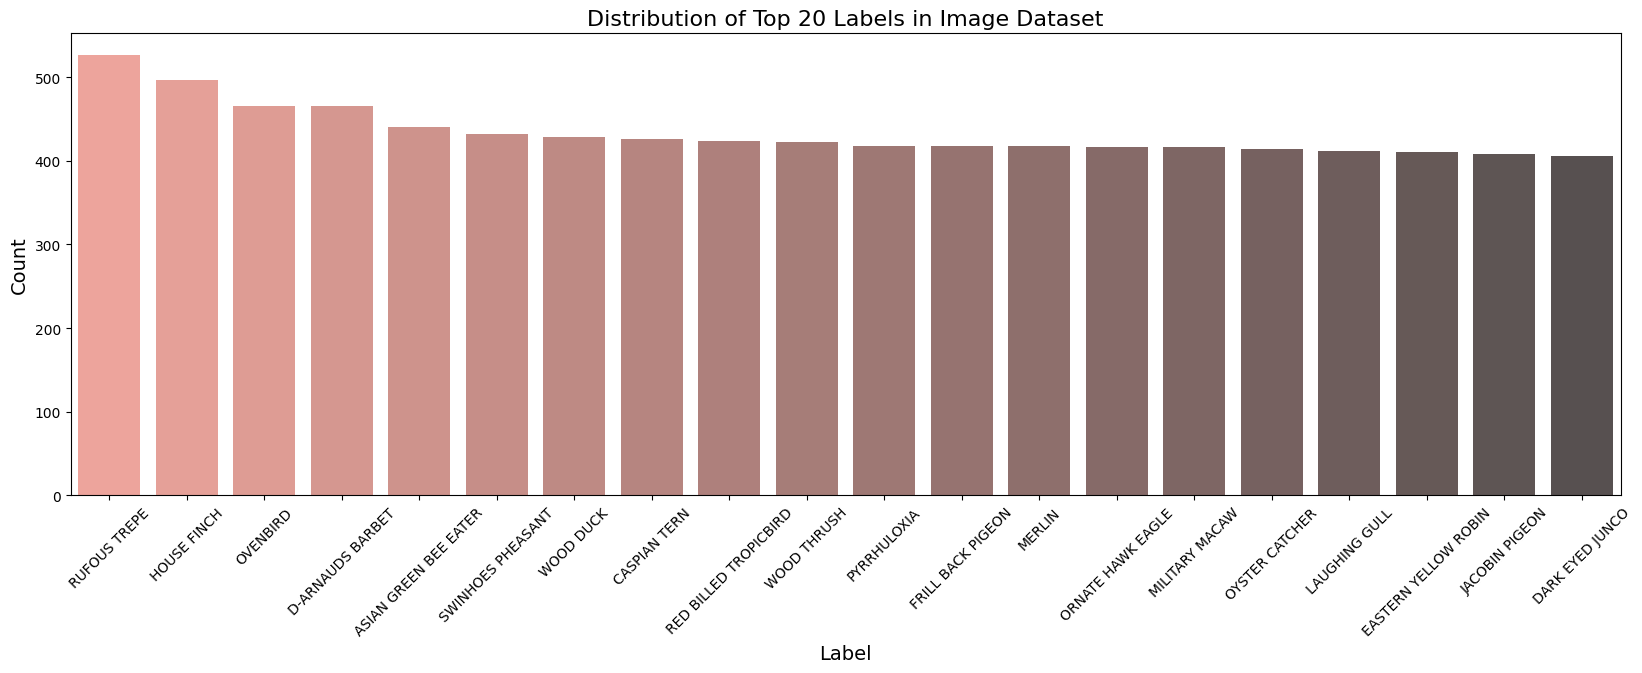

In [15]:
# Get the top 20 labels
label_counts = image_df_train['Label'].value_counts()[:20]

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='dark:salmon_r')
plt.title('Distribution of Top 20 Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

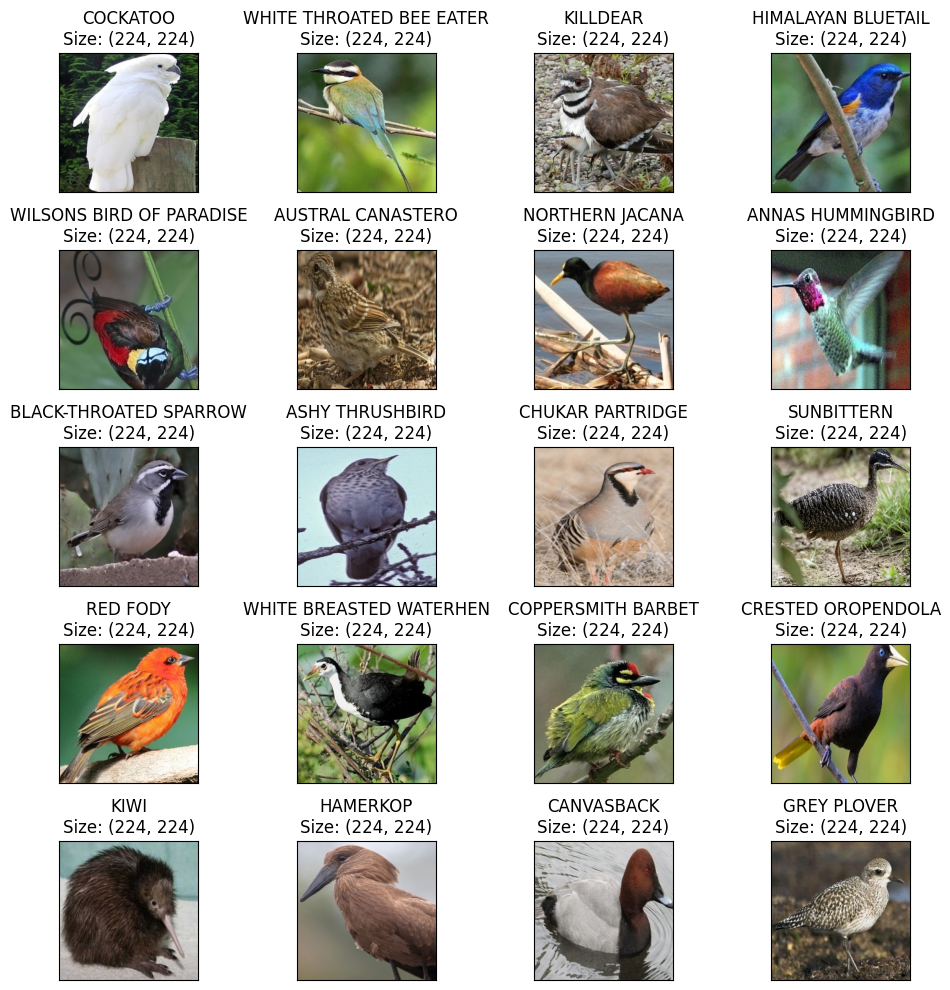

In [16]:
# Display 20 picture of the dataset with their labels and sizes
random_index = np.random.randint(0, len(image_df_train), 20)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = Image.open(image_df_train.Filepath[random_index[i]])
    ax.imshow(img)
    ax.set_title(f"{image_df_train.Label[random_index[i]]}\nSize: {img.size}")
    img.close()
plt.tight_layout()
plt.show()

In [17]:
# Foi verificado que o diretório 'LOONEY BIRDS' não são imagens de pássaros
# Removi para que não sofra interferência no treinamento do modelo.

import shutil

sdir = r'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species'
dirs_to_check = ['train', 'test', 'valid']
dir_to_remove = 'LOONEY BIRDS'

for d in dirs_to_check:
    path_to_remove = os.path.join(sdir, d, dir_to_remove)

    # Verifica se o diretório existe
    if os.path.exists(path_to_remove):
        # Remove o diretório e todos os seus conteúdos
        shutil.rmtree(path_to_remove)
        print(f"O diretório {path_to_remove} foi removido com sucesso.")
    else:
        print(f"O diretório {path_to_remove} não existe e, portanto, não foi removido.")


O diretório C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\train\LOONEY BIRDS foi removido com sucesso.
O diretório C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\test\LOONEY BIRDS foi removido com sucesso.
O diretório C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\valid\LOONEY BIRDS foi removido com sucesso.


In [19]:
# Baixando o csv birds, com metadados. Podemos verificar qual gênero, família e ordem são mais frequentes
birds = pd.read_csv(r'C:\\Users\\aldan\\OneDrive\\Documentos\\GitHub\\aves\\100-bird-species\\birds.csv')
birds.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [20]:
birds['scientific name'].unique()

array(['MALACOCINCLA ABBOTTI', 'PAPASULA ABBOTTI', 'BUCORVUS ABYSSINICUS',
       'BALEARICA REGULORUM', 'CHRYSOCOCCYX CUPREUS',
       'LAGONOSTICTA RUBRICATA', 'HAEMATOPUS MOQUINI', 'TOCKUS FASCIATUS',
       'NETTAPUS AURITUS', 'DIOMEDEIDAE', 'PIPILO ABERTI',
       'PSITTACULA EUPATRIA', 'PYRRHOCORAX GRACULUS',
       'GEOTHLYPIS FLAVOVELATA', 'BOTAURUS LENTIGINOSUS',
       'FULICA AMERICANA', 'PHOENICOPTERUS RUBER', 'SPINUS TRISTIS',
       'FALCO SPARVERIUS', 'ANTHUS RUBESCENS', 'SETOPHAGA RUTICILLA',
       'TURDUS MIGRATORIUS', 'MARECA AMERICANA', 'CALLIPHLOX AMETHYSTINA',
       'CHLOEPHAGA MELANOPTERA', 'VANELLUS RESPLENDENS',
       'SPINUS SPINESCENS', 'ANHINGA ANHINGA', 'MAGUMMA PARVA',
       'CALYPTE ANNA', 'THAMNOPHILIDAE', 'EUPHONIA MUSICA',
       'HIMATIONE SANGUINEA', 'STRUTHIDEA CINEREA',
       'ANTILOPHIA BOKERMANNI', 'OCEANODROMA HOMOCHROA',
       'GEOKICHLA CINEREA', 'NIPPONIA NIPPON', 'EURYSTOMUS ORIENTALIS',
       'MEROPS ORIENTALIS', 'ANASTOMUS OSCITANS',

In [21]:
# Como há muitos IDs repetidos, vou pegar apenas um de cada.
birds_unique = birds.groupby('class id').first().reset_index()
birds_unique.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,1.0,train/ABBOTTS BOOBY/007.jpg,ABBOTTS BOOBY,train,PAPASULA ABBOTTI
2,2.0,train/ABYSSINIAN GROUND HORNBILL/006.jpg,ABYSSINIAN GROUND HORNBILL,train,BUCORVUS ABYSSINICUS
3,3.0,train/AFRICAN CROWNED CRANE/012.jpg,AFRICAN CROWNED CRANE,train,BALEARICA REGULORUM
4,4.0,train/AFRICAN EMERALD CUCKOO/003.jpg,AFRICAN EMERALD CUCKOO,train,CHRYSOCOCCYX CUPREUS


In [24]:
# Para isso precisamos de dados externos. Escolhi o dataframe da IOC World Bird List pois
# oferece uma classificação atualizada das aves do mundo, destacando as mudanças recentes
# na taxonomia avançada com base em conceitos de espécies em evolução e filogenias baseadas em DNA.
# A classificação em aves está sujeita a revisões regulares com base em novas pesquisas publicadas,
# não sendo uma lista estática. Este recurso fornece uma visão abrangente das relações entre as ordens,
# famílias e gêneros das aves.
ioc_list_mult = pd.read_excel('https://worldbirdnames.org/Multiling%20IOC%2013.2_c.xlsx')
ioc_list_mult.head()

,Seq.,Order,Family,IOC_13.2,English,Catalan,Chinese,Chinese (Traditional),Croatian,Czech,...,Indonesian,Korean,Latvian,Macedonian,Malayalam,Northern Sami,Persian,Romanian,Slovenian,Thai
0,1,STRUTHIONIFORMES,Struthionidae,Struthio camelus,Common Ostrich,estruç comú,非洲鸵鸟,鴕鳥,noj,pštros dvouprstý,...,NaN,NaN,Āfrikas strauss,NaN,NaN,Struhcca,NaN,NaN,noj,NaN
1,2,STRUTHIONIFORMES,Struthionidae,Struthio molybdophanes,Somali Ostrich,estruç de Somàlia,灰颈鸵鸟,索馬利亞鴕鳥,somalijski noj,pštros somálský,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,RHEIFORMES,Rheidae,Rhea americana,Greater Rhea,nyandú comú,大美洲鸵,大美洲鴕,veliki nandu,nandu pampový,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RHEIFORMES,Rheidae,Rhea pennata,Lesser Rhea,nyandú de Darwin,小美洲鸵,小美洲鴕,mali nandu,nandu menší,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,APTERYGIFORMES,Apterygidae,Apteryx australis,Southern Brown Kiwi,kiwi bru de l'illa Sud,褐几维,南方褐鷸鴕,mrki kivi,kivi jižní,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
ioc_list_mult['IOC_13.2'].unique()

array(['Struthio camelus', 'Struthio molybdophanes', 'Rhea americana',
       ..., 'Tangara chilensis', 'Tangara callophrys', 'Tangara velia'],
      dtype=object)

In [26]:
# deixando os nomes científicos da coluna 'IOC_13.2' em maiúsculo
ioc_list_mult['IOC_13.2'] = ioc_list_mult['IOC_13.2'].str.upper()

In [27]:
# Renomeando a coluna para concatenação
ioc_list_mult.rename(columns={'IOC_13.2': 'scientific name'}, inplace=True)

In [28]:
# Concatenando os dfs
df_concatenado = pd.merge(birds_unique, ioc_list_mult, on='scientific name', how='outer')

In [29]:
# Colocando 'indisponível' em valores nulos
df_concatenado['Order'].fillna('indisponível', inplace=True)
df_concatenado['Family'].fillna('indisponível', inplace=True)

In [30]:
# Dataset Final
df_final = df_concatenado[['class id', 'filepaths', 'labels', 'data set', 'scientific name', 'Order', 'Family']]

In [31]:
df_final.shape

(11237, 7)

In [32]:
# Fazendo uma busca dos atributos que contém 'indisponível' em Order e Family
result = df_final[df_final['Order'].str.contains("indisponível", case=False, na=False)]
result

,class id,filepaths,labels,data set,scientific name,Order,Family
7,7.0,train/AFRICAN PIED HORNBILL/012.jpg,AFRICAN PIED HORNBILL,train,TOCKUS FASCIATUS,indisponível,indisponível
9,9.0,train/ALBATROSS/038.jpg,ALBATROSS,train,DIOMEDEIDAE,indisponível,indisponível
10,10.0,train/ALBERTS TOWHEE/002.jpg,ALBERTS TOWHEE,train,PIPILO ABERTI,indisponível,indisponível
31,31.0,train/ANTBIRD/015.jpg,ANTBIRD,train,THAMNOPHILIDAE,indisponível,indisponível
32,32.0,train/ANTILLEAN EUPHONIA/013.jpg,ANTILLEAN EUPHONIA,train,EUPHONIA MUSICA,indisponível,indisponível
...,...,...,...,...,...,...,...
498,498.0,train/WHITE CHEEKED TURACO/017.jpg,WHITE CHEEKED TURACO,train,TAURACO LEUCOTIS,indisponível,indisponível
499,499.0,train/WHITE CRESTED HORNBILL/005.jpg,WHITE CRESTED HORNBILL,train,TROPICRANUS ALBOCRISTATUS,indisponível,indisponível
506,506.0,train/WILSONS BIRD OF PARADISE/001.jpg,WILSONS BIRD OF PARADISE,train,CICINNURUS RESPUBLICA,indisponível,indisponível
511,511.0,train/YELLOW BELLIED FLOWERPECKER/053.jpg,YELLOW BELLIED FLOWERPECKER,train,DICAEUM MELANOXANTHUM,indisponível,indisponível


In [33]:
# Verificando os nomes ciêntíficos.
result['scientific name'].unique()

array(['TOCKUS FASCIATUS', 'DIOMEDEIDAE', 'PIPILO ABERTI',
       'THAMNOPHILIDAE', 'EUPHONIA MUSICA', 'OCEANODROMA HOMOCHROA',
       'ANAS FORMOSA', 'HYDRORNIS GUAJANA', 'STRELITZIA',
       'CALYPTORHYNCHUS LATIROSTRIS', 'AMAURORNIS BICOLOR',
       'PUFFINUS OPISTHOMELA', 'PHALACROCORAX PENICILLATUS',
       'PSEUDOSEISURA CRISTAT', 'SERINUS CANARIA DOMESTICA', 'CASUARIUS',
       ' CLAMATOR COROMANDUS', 'ANAS CYANOPTERA', 'RUPICOLA',
       'CACATUIDAE', 'MEGALAIMA HAEMACEPHALA', 'CARACARA CHERIWAY',
       'CORVUS', 'PTEROGLOSSUS BEAUHARNAESII', 'TAENIOPYGIA BICHENOVII',
       'PHALACROCORAX AURITUS', 'PICOIDES PUBESCENS',
       'COCCOTHRAUSTES VESPERTINUS', 'IRENA', 'FREGATIDAE',
       'COLUMBA LIVIA DOMESTICA', 'CORYTHAIXOIDES CONCOLOR',
       'ERYTHRURA GOULDIAE', 'ARGUSIANUS ARGU', 'CORACINA CAESIA',
       'ICHTHYOPHAGA ICHTHYAETUS', 'NUMIDIDAE', 'OPHISTHOCOMUS HOAZIN',
       'UPUPIDAE', 'CHARADRIUS AUSTRALIS', ' VESTIARIA COCCINEA.',
       'ERITHACUS AKAHIGE', 'LONCHU

In [34]:
# Realizei uma busca de cada nome científico e constatei que alguns nomes continham a Order e a Family.
result2 = ioc_list_mult[ioc_list_mult['scientific name'].str.contains("XANTHOCEPHALUS", case=False, na=False)]
result2

,Seq.,Order,Family,scientific name,English,Catalan,Chinese,Chinese (Traditional),Croatian,Czech,...,Indonesian,Korean,Latvian,Macedonian,Malayalam,Northern Sami,Persian,Romanian,Slovenian,Thai
3970,3971,PICIFORMES,Picidae,CHRYSOCOLAPTES XANTHOCEPHALUS,Yellow-faced Flameback,picot sultà caragroc,黄脸金背啄木鸟,黃臉金背啄木,žutoglava žuna,datel negroský,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10484,10485,PASSERIFORMES,Icteridae,XANTHOCEPHALUS XANTHOCEPHALUS,Yellow-headed Blackbird,federal capgroc,黄头黑鹂,黃頭黑鸝,zlatnoglavi vranjak,vlhovec žlutohlavý,...,NaN,NaN,dzeltengalvas strazds,NaN,NaN,Fiskesoaitrupiála,NaN,NaN,rumenoglavi škorčevec,NaN


In [ ]:
# Com isso, irei incluir os dados em Order e Family das seguintes espécies:
'''
PUFFINUS OPISTHOMELA - PUFFINUS OPISTHOMELAS
PSEUDOSEISURA CRISTAT - PSEUDOSEISURA CRISTATA
SERINUS CANARIA DOMESTICA - SERINUS CANARIA
CASUARIUS - CASUARIUS CASUARIUS
 CLAMATOR COROMANDUS - CLAMATOR COROMANDUS
RUPICOLA - RUPICOLA PERUVIANUS
CORVUS - CORVUS SPLENDENS
IRENA - IRENA PUELLA
COLUMBA LIVIA DOMESTICA - COLUMBA LIVIA
ARGUSIANUS ARGU - ARGUSIANUS ARGUS
APTERYX - APTERYX AUSTRALIS
DACELO - DACELO REX
COLINUS VIRGINIANUS RIDGWAYI - COLINUS VIRGINIANUS
HAEMATOPUS - HAEMATOPUS LEUCOPODUS
FRATERCULA - FRATERCULA ARCTICA
PITTA ERYTHROGASTER - ERYTHROPITTA ERYTHROGASTER
PHAETHON AETHEREU - PHAETHON AETHEREUS
GEOCOCCYX - GEOCOCCYX CALIFORNIANUS
ONYCHORHYNCHUS - ONYCHORHYNCHUS CORONATUS
TACHYERES - TACHYERES PATACHONICUS
 EURYPYGA HELIAS - EURYPYGA HELIAS
CEPHALOPTERUS - CEPHALOPTERUS GLABRICOLLIS
 CHRYSOCOCCYX XANTHORHYNCHUS - CHRYSOCOCCYX XANTHORHYNCHUS
XANTHOCEPHALUS - XANTHOCEPHALUS XANTHOCEPHALUS
'''

In [35]:
df_final.loc[df_final['scientific name'] == 'PUFFINUS OPISTHOMELA', 'Order'] = 'PROCELLARIIFORMES'
df_final.loc[df_final['scientific name'] == 'PUFFINUS OPISTHOMELA', 'Family'] = 'Procellariidae'

df_final.loc[df_final['scientific name'] == 'PSEUDOSEISURA CRISTAT', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'PSEUDOSEISURA CRISTAT', 'Family'] = 'Furnariidae'

df_final.loc[df_final['scientific name'] == 'SERINUS CANARIA DOMESTICA', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'SERINUS CANARIA DOMESTICA', 'Family'] = 'Fringillidae'

df_final.loc[df_final['scientific name'] == 'CASUARIUS', 'Order'] = 'CASUARIIFORMES'
df_final.loc[df_final['scientific name'] == 'CASUARIUS', 'Family'] = 'Casuariidae'

df_final.loc[df_final['scientific name'] == ' CLAMATOR COROMANDUS', 'Order'] = 'CUCULIFORMES'
df_final.loc[df_final['scientific name'] == ' CLAMATOR COROMANDUS', 'Family'] = 'Cuculidae'

df_final.loc[df_final['scientific name'] == 'RUPICOLA', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'RUPICOLA', 'Family'] = 'Cotingidae'

df_final.loc[df_final['scientific name'] == 'CORVUS', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'CORVUS', 'Family'] = 'Corvidae'

df_final.loc[df_final['scientific name'] == 'IRENA', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'IRENA', 'Family'] = 'Irenidae'

df_final.loc[df_final['scientific name'] == 'COLUMBA LIVIA DOMESTICA', 'Order'] = 'COLUMBIFORMES'
df_final.loc[df_final['scientific name'] == 'COLUMBA LIVIA DOMESTICA', 'Family'] = 'Columbidae'

df_final.loc[df_final['scientific name'] == 'ARGUSIANUS ARGU', 'Order'] = 'GALLIFORMES'
df_final.loc[df_final['scientific name'] == 'ARGUSIANUS ARGU', 'Family'] = 'Phasianidae'

df_final.loc[df_final['scientific name'] == 'APTERYX', 'Order'] = 'APTERYGIFORMES'
df_final.loc[df_final['scientific name'] == 'APTERYX', 'Family'] = 'Apterygidae'

df_final.loc[df_final['scientific name'] == 'DACELO', 'Order'] = 'CORACIIFORMES'
df_final.loc[df_final['scientific name'] == 'DACELO', 'Family'] = 'Alcedinidae'

df_final.loc[df_final['scientific name'] == 'COLINUS VIRGINIANUS RIDGWAYI', 'Order'] = 'GALLIFORMES'
df_final.loc[df_final['scientific name'] == 'COLINUS VIRGINIANUS RIDGWAYI', 'Family'] = 'Odontophoridae'

df_final.loc[df_final['scientific name'] == 'HAEMATOPUS', 'Order'] = 'CHARADRIIFORMES'
df_final.loc[df_final['scientific name'] == 'HAEMATOPUS', 'Family'] = 'Haematopodidae'

df_final.loc[df_final['scientific name'] == 'FRATERCULA', 'Order'] = 'CHARADRIIFORMES'
df_final.loc[df_final['scientific name'] == 'FRATERCULA', 'Family'] = 'Alcidae'

df_final.loc[df_final['scientific name'] == 'PITTA ERYTHROGASTER', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'PITTA ERYTHROGASTER', 'Family'] = 'Pittidae'

df_final.loc[df_final['scientific name'] == 'PHAETHON AETHEREU', 'Order'] = 'PHAETHONTIFORMES'
df_final.loc[df_final['scientific name'] == 'PHAETHON AETHEREU', 'Family'] = 'Phaethontidae'

df_final.loc[df_final['scientific name'] == 'GEOCOCCYX', 'Order'] = 'CUCULIFORMES'
df_final.loc[df_final['scientific name'] == 'GEOCOCCYX', 'Family'] = 'Cuculidae'

df_final.loc[df_final['scientific name'] == 'ONYCHORHYNCHUS', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'ONYCHORHYNCHUS', 'Family'] = 'Tityridae'

df_final.loc[df_final['scientific name'] == 'TACHYERES', 'Order'] = 'ANSERIFORMES'
df_final.loc[df_final['scientific name'] == 'TACHYERES', 'Family'] = 'Anatidae'

df_final.loc[df_final['scientific name'] == ' EURYPYGA HELIAS', 'Order'] = 'EURYPYGIFORMES'
df_final.loc[df_final['scientific name'] == ' EURYPYGA HELIAS', 'Family'] = 'Eurypygidae'

df_final.loc[df_final['scientific name'] == 'CEPHALOPTERUS', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'CEPHALOPTERUS', 'Family'] = 'Cotingidae'

df_final.loc[df_final['scientific name'] == ' CHRYSOCOCCYX XANTHORHYNCHUS', 'Order'] = 'CUCULIFORMES'
df_final.loc[df_final['scientific name'] == ' CHRYSOCOCCYX XANTHORHYNCHUS', 'Family'] = 'Cuculidae'

df_final.loc[df_final['scientific name'] == 'XANTHOCEPHALUS', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'XANTHOCEPHALUS', 'Family'] = 'Icteridae'


In [36]:
df_temp = df_final.iloc[523:531]
df_temp

,class id,filepaths,labels,data set,scientific name,Order,Family
523,523.0,train/GREY HEADED CHACHALACA/107.jpg,GREY HEADED CHACHALACA,train,ORTALIS CINEREICEPS,GALLIFORMES,Cracidae
524,524.0,train/BLACK BREASTED PUFFBIRD/42.jpg,BLACK BREASTED PUFFBIRD,train,NOTHARCHUS PECTORALIS,PICIFORMES,Bucconidae
525,NaN,NaN,NaN,NaN,STRUTHIO MOLYBDOPHANES,STRUTHIONIFORMES,Struthionidae
526,NaN,NaN,NaN,NaN,RHEA AMERICANA,RHEIFORMES,Rheidae
527,NaN,NaN,NaN,NaN,RHEA PENNATA,RHEIFORMES,Rheidae
528,NaN,NaN,NaN,NaN,APTERYX AUSTRALIS,APTERYGIFORMES,Apterygidae
529,NaN,NaN,NaN,NaN,APTERYX MANTELLI,APTERYGIFORMES,Apterygidae
530,NaN,NaN,NaN,NaN,APTERYX ROWI,APTERYGIFORMES,Apterygidae


In [37]:
# Mantendo as linhas até a linha 524 (inclusive)
df_final = df_final.iloc[:525]

In [38]:
result3 = df_final[df_final['Family'].str.contains("indisponível", case=False, na=False)]
result3


,class id,filepaths,labels,data set,scientific name,Order,Family
7,7.0,train/AFRICAN PIED HORNBILL/012.jpg,AFRICAN PIED HORNBILL,train,TOCKUS FASCIATUS,indisponível,indisponível
9,9.0,train/ALBATROSS/038.jpg,ALBATROSS,train,DIOMEDEIDAE,indisponível,indisponível
10,10.0,train/ALBERTS TOWHEE/002.jpg,ALBERTS TOWHEE,train,PIPILO ABERTI,indisponível,indisponível
31,31.0,train/ANTBIRD/015.jpg,ANTBIRD,train,THAMNOPHILIDAE,indisponível,indisponível
32,32.0,train/ANTILLEAN EUPHONIA/013.jpg,ANTILLEAN EUPHONIA,train,EUPHONIA MUSICA,indisponível,indisponível
36,36.0,train/ASHY STORM PETREL/007.jpg,ASHY STORM PETREL,train,OCEANODROMA HOMOCHROA,indisponível,indisponível
51,51.0,train/BAIKAL TEAL/039.jpg,BAIKAL TEAL,train,ANAS FORMOSA,indisponível,indisponível
59,59.0,train/BANDED PITA/006.jpg,BANDED PITA,train,HYDRORNIS GUAJANA,indisponível,indisponível
71,71.0,train/BIRD OF PARADISE/037.jpg,BIRD OF PARADISE,train,STRELITZIA,indisponível,indisponível
74,74.0,train/BLACK COCKATO/016.jpg,BLACK COCKATO,train,CALYPTORHYNCHUS LATIROSTRIS,indisponível,indisponível


In [39]:
result3.shape
# Como a quantidade de espécies com Ordem e Família 'indisponível' é pequena, eu pesquisei o restante das informações no Google.

(49, 7)

In [40]:
result3['scientific name'].unique()

array(['TOCKUS FASCIATUS', 'DIOMEDEIDAE', 'PIPILO ABERTI',
       'THAMNOPHILIDAE', 'EUPHONIA MUSICA', 'OCEANODROMA HOMOCHROA',
       'ANAS FORMOSA', 'HYDRORNIS GUAJANA', 'STRELITZIA',
       'CALYPTORHYNCHUS LATIROSTRIS', 'AMAURORNIS BICOLOR',
       'PHALACROCORAX PENICILLATUS', 'ANAS CYANOPTERA', 'CACATUIDAE',
       'MEGALAIMA HAEMACEPHALA', 'CARACARA CHERIWAY',
       'PTEROGLOSSUS BEAUHARNAESII', 'TAENIOPYGIA BICHENOVII',
       'PHALACROCORAX AURITUS', 'PICOIDES PUBESCENS',
       'COCCOTHRAUSTES VESPERTINUS', 'FREGATIDAE',
       'CORYTHAIXOIDES CONCOLOR', 'ERYTHRURA GOULDIAE', 'CORACINA CAESIA',
       'ICHTHYOPHAGA ICHTHYAETUS', 'NUMIDIDAE', 'OPHISTHOCOMUS HOAZIN',
       'UPUPIDAE', 'CHARADRIUS AUSTRALIS', ' VESTIARIA COCCINEA.',
       'ERITHACUS AKAHIGE', 'LONCHURA ORYZIVORA', 'STRIGOPS HABROPTILUS',
       'LUNATICUS AMERICONIS', 'GALLIRALLUS OKINAWAE', 'ANAS PUNA',
       'PORPHYRIO MARTINICUS', 'PHALACROCORAX URILE', 'REGULUS CALENDULA',
       'GRUS CANADENSIS', 'PARI

In [41]:
df_final.loc[df_final['scientific name'] == 'TOCKUS FASCIATUS', 'Order'] = 'BUCEROTIFORMES'
df_final.loc[df_final['scientific name'] == 'TOCKUS FASCIATUS', 'Family'] = 'Bucerotidae'

df_final.loc[df_final['scientific name'] == 'DIOMEDEIDAE', 'Order'] = 'PROCELLARIIFORMES'
df_final.loc[df_final['scientific name'] == 'DIOMEDEIDAE', 'Family'] = 'Diomedeidae'

df_final.loc[df_final['scientific name'] == 'PIPILO ABERTI', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'PIPILO ABERTI', 'Family'] = 'Emberizidae'

df_final.loc[df_final['scientific name'] == 'THAMNOPHILIDAE', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'THAMNOPHILIDAE', 'Family'] = 'Thamnophilidae'

df_final.loc[df_final['scientific name'] == 'EUPHONIA MUSICA', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'EUPHONIA MUSICA', 'Family'] = 'Fringillidae'

df_final.loc[df_final['scientific name'] == 'OCEANODROMA HOMOCHROA', 'Order'] = 'PROCELLARIIFORMES'
df_final.loc[df_final['scientific name'] == 'OCEANODROMA HOMOCHROA', 'Family'] = 'Hydrobatidae'

df_final.loc[df_final['scientific name'] == 'ANAS FORMOSA', 'Order'] = 'ANSERIFORMES'
df_final.loc[df_final['scientific name'] == 'ANAS FORMOSA', 'Family'] = 'Anatidae'

df_final.loc[df_final['scientific name'] == 'HYDRORNIS GUAJANA', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'HYDRORNIS GUAJANA', 'Family'] = 'Pittidae'

df_final.loc[df_final['scientific name'] == 'STRELITZIA', 'Order'] = 'ZINGIBERALES'
df_final.loc[df_final['scientific name'] == 'STRELITZIA', 'Family'] = 'Strelitziaceae'

df_final.loc[df_final['scientific name'] == 'CALYPTORHYNCHUS LATIROSTRIS', 'Order'] = 'PSITTACIFORMES'
df_final.loc[df_final['scientific name'] == 'CALYPTORHYNCHUS LATIROSTRIS', 'Family'] = 'Cacatuidae'

df_final.loc[df_final['scientific name'] == 'AMAURORNIS BICOLOR', 'Order'] = 'GRUIFORMES'
df_final.loc[df_final['scientific name'] == 'AMAURORNIS BICOLOR', 'Family'] = 'Rallidae'

df_final.loc[df_final['scientific name'] == 'PHALACROCORAX PENICILLATUS', 'Order'] = 'SULIFORMES'
df_final.loc[df_final['scientific name'] == 'PHALACROCORAX PENICILLATUS', 'Family'] = 'Phalacrocoracidae'

df_final.loc[df_final['scientific name'] == 'ANAS CYANOPTERA', 'Order'] = 'ANSERIFORMES'
df_final.loc[df_final['scientific name'] == 'ANAS CYANOPTERA', 'Family'] = 'Anatidae'

df_final.loc[df_final['scientific name'] == 'CACATUIDAE', 'Order'] = 'PSITTACIFORMES'
df_final.loc[df_final['scientific name'] == 'CACATUIDAE', 'Family'] = 'Cacatuidae'

df_final.loc[df_final['scientific name'] == 'MEGALAIMA HAEMACEPHALA', 'Order'] = 'PICIFORMES'
df_final.loc[df_final['scientific name'] == 'MEGALAIMA HAEMACEPHALA', 'Family'] = 'Megalaimidae'

df_final.loc[df_final['scientific name'] == 'CARACARA CHERIWAY', 'Order'] = 'FALCONIFORMES'
df_final.loc[df_final['scientific name'] == 'CARACARA CHERIWAY', 'Family'] = 'Falconidae'

df_final.loc[df_final['scientific name'] == 'PTEROGLOSSUS BEAUHARNAESII', 'Order'] = 'PICIFORMES'
df_final.loc[df_final['scientific name'] == 'PTEROGLOSSUS BEAUHARNAESII', 'Family'] = 'Ramphastidae'

df_final.loc[df_final['scientific name'] == 'TAENIOPYGIA BICHENOVII', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'TAENIOPYGIA BICHENOVII', 'Family'] = 'Estrildidae'

df_final.loc[df_final['scientific name'] == 'PHALACROCORAX AURITUS', 'Order'] = 'SULIFORMES'
df_final.loc[df_final['scientific name'] == 'PHALACROCORAX AURITUS', 'Family'] = 'Phalacrocoracidae'

df_final.loc[df_final['scientific name'] == 'PICOIDES PUBESCENS', 'Order'] = 'PICIFORMES'
df_final.loc[df_final['scientific name'] == 'PICOIDES PUBESCENS', 'Family'] = 'Picidae'

df_final.loc[df_final['scientific name'] == 'COCCOTHRAUSTES VESPERTINUS', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'COCCOTHRAUSTES VESPERTINUS', 'Family'] = 'Fringillidae'

df_final.loc[df_final['scientific name'] == 'FREGATIDAE', 'Order'] = 'SULIFORMES'
df_final.loc[df_final['scientific name'] == 'FREGATIDAE', 'Family'] = 'Fregatidae'

df_final.loc[df_final['scientific name'] == 'CORYTHAIXOIDES CONCOLOR', 'Order'] = 'MUSOPHAGIFORMES'
df_final.loc[df_final['scientific name'] == 'CORYTHAIXOIDES CONCOLOR', 'Family'] = 'Musophagidae'

df_final.loc[df_final['scientific name'] == 'ERYTHRURA GOULDIAE', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'ERYTHRURA GOULDIAE', 'Family'] = 'Estrildidae'

df_final.loc[df_final['scientific name'] == 'CORACINA CAESIA', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'CORACINA CAESIA', 'Family'] = 'Corvidae'

df_final.loc[df_final['scientific name'] == 'ICHTHYOPHAGA ICHTHYAETUS', 'Order'] = 'ACCIPITRIFORMES'
df_final.loc[df_final['scientific name'] == 'ICHTHYOPHAGA ICHTHYAETUS', 'Family'] = 'Accipitridae'

df_final.loc[df_final['scientific name'] == 'NUMIDIDAE', 'Order'] = 'GALLIFORMES'
df_final.loc[df_final['scientific name'] == 'NUMIDIDAE', 'Family'] = 'Numididae'

df_final.loc[df_final['scientific name'] == 'OPHISTHOCOMUS HOAZIN', 'Order'] = 'OPISTHOCOMIFORMES'
df_final.loc[df_final['scientific name'] == 'OPHISTHOCOMUS HOAZIN', 'Family'] = 'Opisthocomidae'

df_final.loc[df_final['scientific name'] == 'UPUPIDAE', 'Order'] = 'BUCEROTIFORMES'
df_final.loc[df_final['scientific name'] == 'UPUPIDAE', 'Family'] = 'Upupidae'

df_final.loc[df_final['scientific name'] == 'CHARADRIUS AUSTRALIS', 'Order'] = 'CHARADRIIFORMES'
df_final.loc[df_final['scientific name'] == 'CHARADRIUS AUSTRALIS', 'Family'] = 'Charadriidae'

df_final.loc[df_final['scientific name'] == ' VESTIARIA COCCINEA.', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == ' VESTIARIA COCCINEA.', 'Family'] = 'Fringillidae'

df_final.loc[df_final['scientific name'] == 'ERITHACUS AKAHIGE', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'ERITHACUS AKAHIGE', 'Family'] = 'Muscicapidae'

df_final.loc[df_final['scientific name'] == 'LONCHURA ORYZIVORA', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'LONCHURA ORYZIVORA', 'Family'] = 'Estrildidae'

df_final.loc[df_final['scientific name'] == 'STRIGOPS HABROPTILUS', 'Order'] = 'PSITTACIFORMES'
df_final.loc[df_final['scientific name'] == 'STRIGOPS HABROPTILUS', 'Family'] = 'Strigopidae'

df_final.loc[df_final['scientific name'] == 'GALLIRALLUS OKINAWAE', 'Order'] = 'GRUIFORMES'
df_final.loc[df_final['scientific name'] == 'GALLIRALLUS OKINAWAE', 'Family'] = 'Rallidae'

df_final.loc[df_final['scientific name'] == 'ANAS PUNA', 'Order'] = 'ANSERIFORMES'
df_final.loc[df_final['scientific name'] == 'ANAS PUNA', 'Family'] = 'Anatidae'

df_final.loc[df_final['scientific name'] == 'PORPHYRIO MARTINICUS', 'Order'] = 'GRUIFORMES'
df_final.loc[df_final['scientific name'] == 'PORPHYRIO MARTINICUS', 'Family'] = 'Rallidae'

df_final.loc[df_final['scientific name'] == 'PHALACROCORAX URILE', 'Order'] = 'PELECANIFORMES'
df_final.loc[df_final['scientific name'] == 'PHALACROCORAX URILE', 'Family'] = 'Phalacrocoracidae'

df_final.loc[df_final['scientific name'] == 'REGULUS CALENDULA', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'REGULUS CALENDULA', 'Family'] = 'Regulidae'

df_final.loc[df_final['scientific name'] == 'GRUS CANADENSIS', 'Order'] = 'GRUIFORMES'
df_final.loc[df_final['scientific name'] == 'GRUS CANADENSIS', 'Family'] = 'Gruidae'

df_final.loc[df_final['scientific name'] == 'PARIDAE', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'PARIDAE', 'Family'] = 'Paridae'

df_final.loc[df_final['scientific name'] == 'RAMPHASTIDAE', 'Order'] = 'PICIFORMES'
df_final.loc[df_final['scientific name'] == 'RAMPHASTIDAE', 'Family'] = 'Ramphastidae'

df_final.loc[df_final['scientific name'] == 'MUSOPHAGA VIOLACEA', 'Order'] = 'MUSOPHAGIFORMES'
df_final.loc[df_final['scientific name'] == 'MUSOPHAGA VIOLACEA', 'Family'] = 'Musophagidae'

df_final.loc[df_final['scientific name'] == 'AMAURORNIS CINEREA', 'Order'] = 'GRUIFORMES'
df_final.loc[df_final['scientific name'] == 'AMAURORNIS CINEREA', 'Family'] = 'Rallidae'

df_final.loc[df_final['scientific name'] == 'TAURACO LEUCOTIS', 'Order'] = 'MUSOPHAGIFORMES'
df_final.loc[df_final['scientific name'] == 'TAURACO LEUCOTIS', 'Family'] = 'Musophagidae'

df_final.loc[df_final['scientific name'] == 'TROPICRANUS ALBOCRISTATUS', 'Order'] = 'BUCEROTIFORMES'
df_final.loc[df_final['scientific name'] == 'TROPICRANUS ALBOCRISTATUS', 'Family'] = 'Bucerotidae'

df_final.loc[df_final['scientific name'] == 'CICINNURUS RESPUBLICA', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'CICINNURUS RESPUBLICA', 'Family'] = 'Paradisaeidae'

df_final.loc[df_final['scientific name'] == 'DICAEUM MELANOXANTHUM', 'Order'] = 'PASSERIFORMES'
df_final.loc[df_final['scientific name'] == 'DICAEUM MELANOXANTHUM', 'Family'] = 'Dicaeidae'



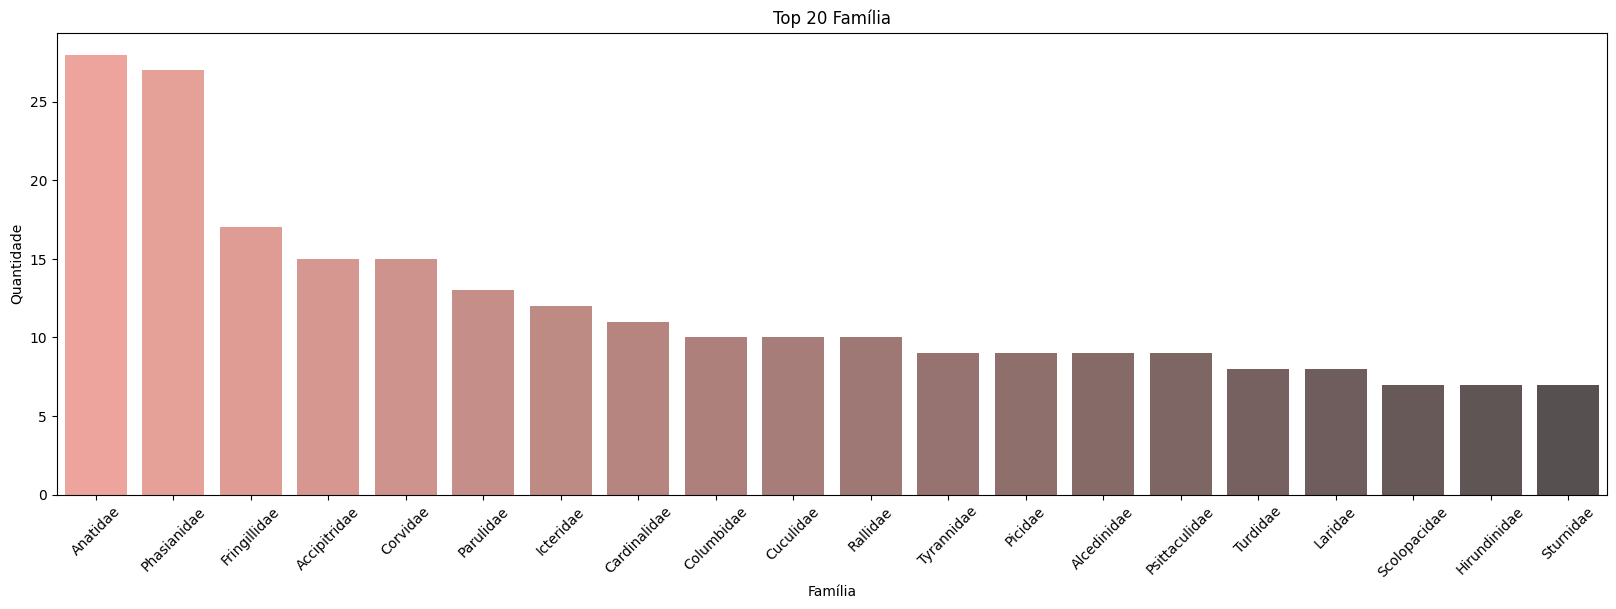

In [42]:
# Qual a Família mais frequente?
familias_frequentes = df_final['Family'].value_counts()[:20]

plt.figure(figsize=(20, 6))
sns.barplot(x=familias_frequentes.index, y=familias_frequentes.values, alpha=0.8, palette='dark:salmon_r')
plt.xlabel('Família')
plt.ylabel('Quantidade')
plt.title('Top 20 Família')
plt.xticks(rotation=45)
plt.show()

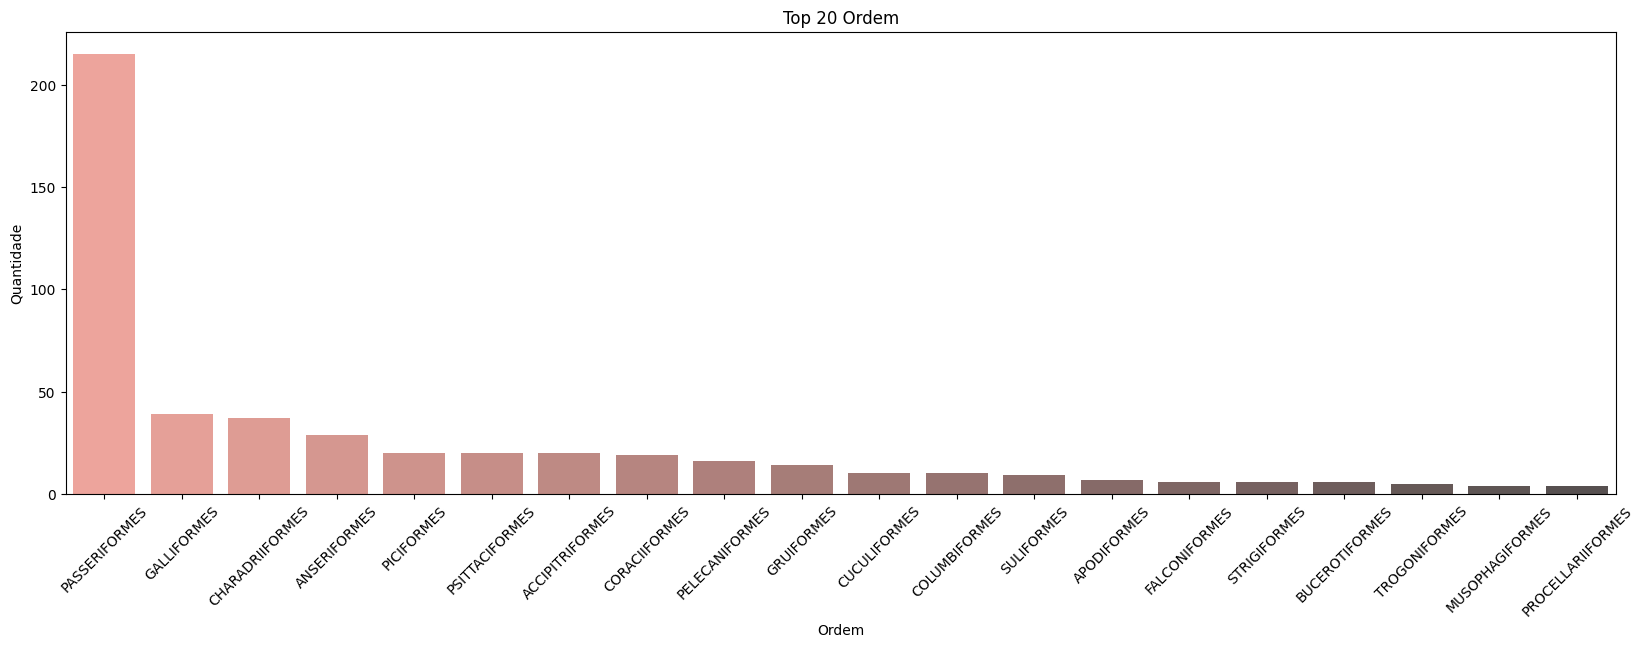

In [43]:
# Qual a Ordem mais frequente?
ordens_frequentes = df_final['Order'].value_counts()[:20]

plt.figure(figsize=(20, 6))
sns.barplot(x=ordens_frequentes.index, y=ordens_frequentes.values, alpha=0.8, palette='dark:salmon_r')
plt.xlabel('Ordem')
plt.ylabel('Quantidade')
plt.title('Top 20 Ordem')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Apesar do maior quantitativo de pássaros serem da Ordem Passeriformes, o maior quantitativo da Família de pássaros
# é a Anatidae, de Ordem Anseriformes.